# Modelling viral and immune dynamics 

#### A model of viral strain competition from "Host–virus evolutionary dynamics with specialist and generalist infection strategies: Bifurcations, bistability, and chaos" - AIP Chaos (2020)

## The model

The model is a set of Ordinary Differential Equations with seven compartments:

* $z$, the general strain of a virus 

* $z^s$, the specialist strain of a virus 

* $x_1$, susceptible target cells that can be infected by specialist and general strains of a virus 

* $x_2$, susceptible target cells that can only be infected by a general strain of a virus 

* $y_1$, infected $x_1$ cells that are infected by the general strain

* $y_1^s$, infected $x_1$ cells that are infected by the specialist strain

* $y_2$, infected $x_2$ cells


It is assumed that the uninfected cells have growth rates $\beta_i$ and $\delta_i$, where $\beta_i>\delta_i$,$\beta_1\neq\beta_2$ and $\delta_1\neq\delta_2$ to ensure the cell populations don't completely die out and to establish two different cell populations. The cell populations also undergo logistic growth, leading to:
$$\dot{x}_1=\beta_1x_1\bigg(1-\frac{x_1+x_2}{K}\bigg)-\delta_1x_1$$

$$\dot{x}_2=\beta_2x_2\bigg(1-\frac{x_1+x_2}{K}\bigg)-\delta_2x_2$$

Infection by the generalist and specialist viral strains occur at rates $\alpha$ and $\alpha^s$, leading to two additional terms in the evolution equation of $x_1$ and a single term in the evolution equation of $x_2$:
$$\dot{x}_1=\beta_1x_1\bigg(1-\frac{x_1+x_2}{K}\bigg)-x_1\alpha z-x_1\alpha^sz^s-\delta_1x_1$$

$$\dot{x}_2=\beta_2x_2\bigg(1-\frac{x_1+x_2}{K}\bigg)-x_2\alpha z - \delta_2 x_2$$

These infections are reflected in the infected cell evolution equations by including identical terms:
$$\dot{y}_1 = x_1\alpha z$$

$$\dot{y}_1^s = x_1\alpha^s z^s$$

$$\dot{y}_2 = x_2\alpha z$$

However it is also assumed that these cells die at different rates $\gamma_1$, $\gamma_1^s$ and $\gamma_2$ as a result of being infected: 
$$\dot{y}_1 = x_1\alpha z - \gamma_1y_1$$

$$\dot{y}_1^s = x_1\alpha^s z^s-\gamma_1^sy^s_1$$

$$\dot{y}_2 = x_2\alpha z- \gamma_2y_2$$

Mutation from $z_1$ to $z_1^s$ is modelled by including a cross term $\mu y_1$ that links the comparments $y_1$ and $y_1^s$:
$$\dot{y}_1 = x_1\alpha z - \gamma_1y_1 - \mu y_1$$

$$\dot{y}_1^s = x_1\alpha^s z^s-\gamma_1^sy^s_1 +\mu y_1$$

The by accounting through the effects of cell lysis through factors $\kappa^s$, $\kappa_1$ and $\kappa_2$, viral population growth and decay is described by the respective terms in each evolution equation:

$$\dot{z}^s=\kappa^s\gamma^s_1y^s_1-\zeta^sz^s$$

$$\dot{z}=\kappa_1\gamma_1y_1+\kappa_2\gamma_2y_2-\zeta_z$$

However the multiplicity of infection is accounted for by factors $\nu^s$ and $\nu$, leading to:

$$\dot{z}^s=\kappa^s\gamma^s_1y^s_1-\nu^s\alpha^sz^sx_1-\zeta^sz^s$$

$$\dot{z}=\kappa_1\gamma_1y_1+\kappa_2\gamma_2y_2-\nu\alpha z(x_1+x_2)-\zeta z$$

## Initial simulations

In [1]:
from Model import Model

params = {'alpha': 0.5,
         'alpha_s':2.0,
         'beta_1':1.5,
         'beta_2':2.0,
         'mu':0.1,
         'gamma_1_s':0.25,
         'gamma_1':0.25,
         'gamma_2':0.25,
          'nu':0.5,
         'nu_s':0.5,
         'zeta':0.22,
         'zeta_s':0.22,
         'kappa_1':1.00,
         'kappa_2':1.00}

model = Model(params = params)

In [2]:
model.run()

Simulation beginning for 80000 time steps.
Number of dimensions: 7
Simulation complete!


,Time,x1,x2,ys1,y1,y2,zs,z
0,0.0,1.000000,0.050000,0.000000,0.000000e+00,0.000000e+00,0.010000,5.000000e-01
1,0.1,0.970837,0.046109,0.001953,2.362949e-02,1.157393e-03,0.008888,4.769616e-01
2,0.2,0.946607,0.042826,0.003838,4.477098e-02,2.151695e-03,0.007969,4.559143e-01
3,0.3,0.926398,0.040018,0.005682,6.375091e-02,3.010330e-03,0.007212,4.366207e-01
4,0.4,0.909501,0.037587,0.007507,8.083840e-02,3.754774e-03,0.006593,4.188826e-01
...,...,...,...,...,...,...,...,...
79995,7999.5,0.784882,0.131851,0.002152,3.054760e-185,2.675965e-185,0.000513,3.454833e-185
79996,7999.6,0.791283,0.127501,0.002178,3.083245e-185,2.631977e-185,0.000515,3.442902e-185
79997,7999.7,0.797572,0.123243,0.002206,3.111359e-185,2.588268e-185,0.000517,3.430943e-185
79998,7999.8,0.803748,0.119080,0.002233,3.139087e-185,2.544852e-185,0.000520,3.418959e-185


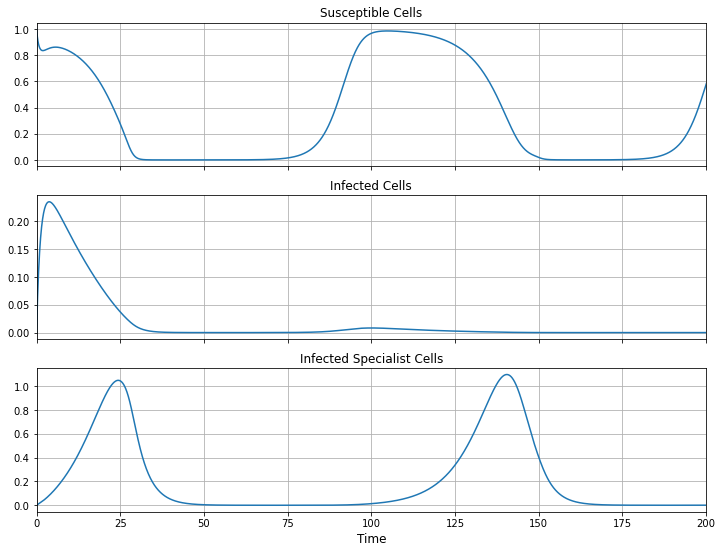

In [3]:
model.plot_specialist_cells(xmax = 200)

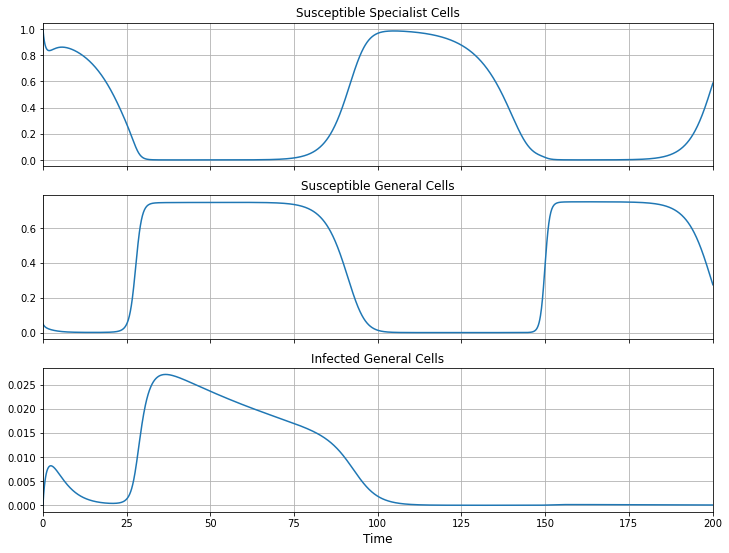

In [4]:
model.plot_general_cells(xmax = 200)

### Multi-Models

In [5]:
params_1 = {'alpha': 0.5,
         'alpha_s':2.0,
         'beta_1':1.5,
         'beta_2':2.0,
         'mu':0.1,
         'gamma_1_s':0.25,
         'gamma_1':0.25,
         'gamma_2':0.25,
          'nu':0.5,
         'nu_s':0.5,
         'zeta':0.22,
         'zeta_s':0.22,
         'kappa_1':1.00,
         'kappa_2':1.00}

model_1 = Model(params = params_1)

params_2 = {'alpha': 0.8,
         'alpha_s':2.0,
         'beta_1':1.5,
         'beta_2':2.0,
         'mu':0.1,
         'gamma_1_s':0.25,
         'gamma_1':0.25,
         'gamma_2':0.25,
          'nu':0.5,
         'nu_s':0.5,
         'zeta':0.22,
         'zeta_s':0.22,
         'kappa_1':1.00,
         'kappa_2':1.00}

model_2 = Model(params = params_2)

params_3 = {'alpha': 0.9,
         'alpha_s':2.0,
         'beta_1':1.5,
         'beta_2':2.0,
         'mu':0.1,
         'gamma_1_s':0.25,
         'gamma_1':0.25,
         'gamma_2':0.25,
          'nu':0.5,
         'nu_s':0.5,
         'zeta':0.22,
         'zeta_s':0.22,
         'kappa_1':1.00,
         'kappa_2':1.00}

model_3 = Model(params = params_3)

models = [model_1, model_2, model_3]

multi_model = MultiModel(models)

NameError: name 'MultiModel' is not defined

In [ ]:
multimodel.run()